## Problem Statement:Classification using Deep neural network (Any One from the following)
    
1. Multiclass classification using Deep Neural Networks: Example: Use the OCR letter
recognition datasethttps://archive.ics.uci.edu/ml/datasets/letter+recognition
2. Binary classification using Deep Neural Networks Example: Classify movie reviews into
positive" reviews and "negative" reviews, just based on the text content of the reviews.
Use IMDB dataset

In [ ]:
from keras.datasets import imdb

## Load and split the dataset into traning and testing

In [ ]:
(train_data,train_labels),(test_data,test_labels)=imdb.load_data(num_words=10000)

#x_test = test_data

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
train_data.shape

(25000,)

In [ ]:
train_labels[0]

1

In [ ]:
word_index=imdb.get_word_index()
reverse_word_index=dict([value,key] for (key,value) in word_index.items())
decoded_review = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])

1641221/1641221 [==============================] - 0s 0us/step


In [ ]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

## Prepare the data

In [ ]:
import numpy as np

In [ ]:
#perform one_hot vector encoding
def vectorize(sequences,dimensions=10000):
  results = np.zeros((len(sequences),dimensions))
  for i, sequences in enumerate(sequences):
    results[i,sequences]=1
  return results

In [ ]:
x_train=vectorize(train_data)

In [ ]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## Building the network

In [ ]:
from keras import models
from keras import layers

In [ ]:
model = models.Sequential()

In [ ]:
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation = 'sigmoid'))

In [ ]:
#compilation step 
#from keras import util.custom_object_scope
model.compile(optimizer='RMSprop',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
#validating the approach
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

In [ ]:
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
#fit the model
history=model.fit(partial_x_train,partial_y_train,epochs=20, batch_size=512, validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 3s 86ms/step - loss: 0.5624 - accuracy: 0.7721 - val_loss: 0.4421 - val_accuracy: 0.8590
Epoch 2/20
30/30 [==============================] - 1s 45ms/step - loss: 0.3683 - accuracy: 0.8861 - val_loss: 0.3425 - val_accuracy: 0.8801
Epoch 3/20
30/30 [==============================] - 2s 56ms/step - loss: 0.2743 - accuracy: 0.9125 - val_loss: 0.3221 - val_accuracy: 0.8684
Epoch 4/20
30/30 [==============================] - 2s 57ms/step - loss: 0.2168 - accuracy: 0.9261 - val_loss: 0.2776 - val_accuracy: 0.8865
Epoch 5/20
30/30 [==============================] - 2s 59ms/step - loss: 0.1772 - accuracy: 0.9408 - val_loss: 0.3059 - val_accuracy: 0.8759
Epoch 6/20
30/30 [==============================] - 2s 77ms/step - loss: 0.1494 - accuracy: 0.9515 - val_loss: 0.2808 - val_accuracy: 0.8850
Epoch 7/20
30/30 [==============================] - 1s 44ms/step - loss: 0.1305 - accuracy: 0.9592 - val_loss: 0.2923 - val_accuracy: 0.8850
Epoch 8/20
30

In [ ]:
history_dict = history.history

In [ ]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
acc = history_dict['accuracy']
val_loss = history_dict['val_loss']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']

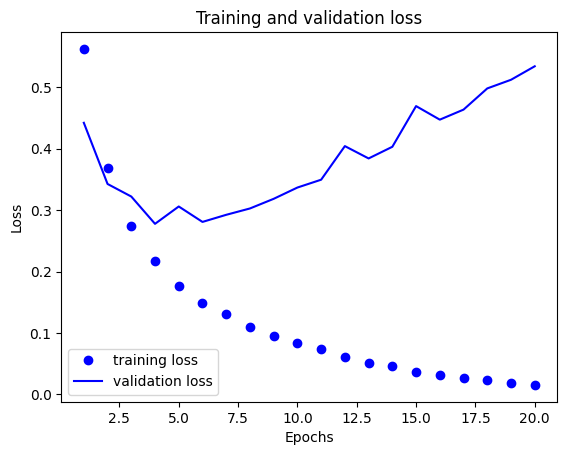

In [ ]:
#plotting training and validation loss
import matplotlib.pyplot as plt
epochs = range(1, len(acc)+1)
plt.plot(epochs, loss, 'bo', label = 'training loss')
plt.plot(epochs, val_loss,'b', label = 'validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

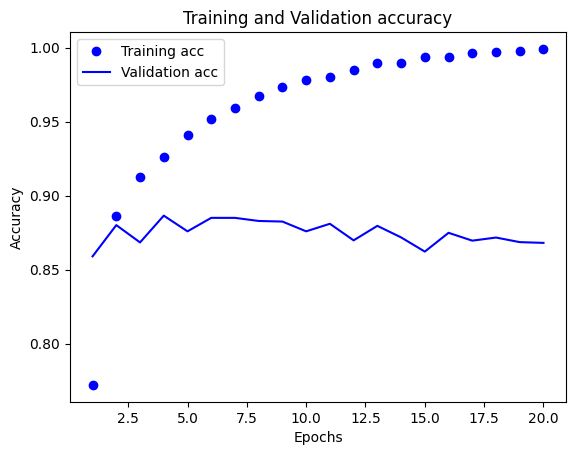

In [ ]:
plt.clf()
plt.plot(epochs, acc, 'bo',label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
import numpy as np
#result = model.predict(test_data)
print(np.mean(history_dict['accuracy']))
#print(history_dict)

0.9594466716051102
